## Optimizacion y evaluacion de modelos

Vamos a trabajar con el dataset de paltas. Su descripción la pueden encontrar en https://www.kaggle.com/neuromusic/avocado-prices.
Vamos a seleccionar los datos de Paltas convencionales de Chicago.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
palta = pd.read_csv('avocado.csv', delimiter=',', parse_dates=["Date"])

palta.drop('Unnamed: 0', axis = 1, inplace = True)
palta.sort_values("Date", inplace = True)
palta.reset_index(inplace = True, drop  = True)

palta_chicago = palta[palta.region == 'Chicago']
palta_chicago.reset_index(inplace = True, drop = True)
palta_chicago['Date']=palta_chicago['Date'].map(dt.datetime.toordinal)
palta_chicago_convencional = palta_chicago[palta_chicago.type == 'conventional']

X = palta_chicago_convencional.Date.values.reshape(-1,1)
y = palta_chicago_convencional.AveragePrice.values  

<ipython-input-3-328a26c3bdf2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palta_chicago['Date']=palta_chicago['Date'].map(dt.datetime.toordinal)


### Antes de empezar a trabajar, vamos a separar nuestros datos en el conjunto de datos de entrenamiento y el de Held-out:
### 1) Importar de Sckit-learn la funcion "train_test_split"
### 2) Separar los datos de entrenamiento y Held-out utilizando la funcion que acabamos de importar. 

In [4]:
# RESPUESTA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=0)

/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


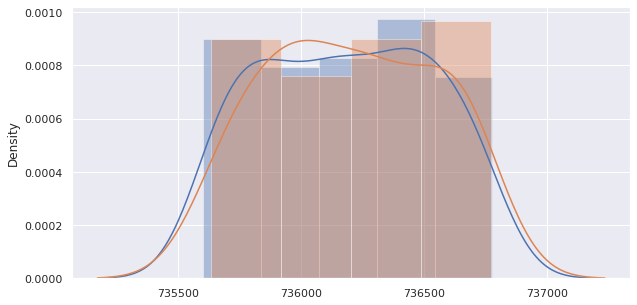

In [5]:
for i in range(X_train.shape[1]):
    plt.figure(figsize=(10,5))
    sns.distplot(X_train[:,i])
    sns.distplot(X_test[:,i])
    plt.show()


### Para realizar el gridsearch, seguir los siguientes pasos:
### 1) Importa la funcion "DecisionTreeRegressor"
### 2) Cargar un DecisionTreeRegressor en la variable "rgr_tree"
### 3) En la variable diccionario "parameters" especificar en qué valores queremos realizar el Grid Search 
(sólo tenes que completar la ayuda!)
### 4) Ejecutar el Grid search. Buscá en internet qué significa la variable cv y completá. 

In [6]:
### RESPUESTA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

rgr_tree = DecisionTreeRegressor()
parameters = {'criterion':['mae', 'mse'], 'max_depth':[2,5,7,10,15,20]}
clf = GridSearchCV(rgr_tree, parameters, cv=10,scoring='neg_mean_squared_error',return_train_score=True, n_jobs=-1)


### Una vez que determinamos cuales son los parametros de busqueda, vamos a entrenar el gridsearch con los datos de entrenamiento. 
(Solamente tenes que ejecutar esta celda)


In [7]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mae', 'mse'],
                         'max_depth': [2, 5, 7, 10, 15, 20]},
             return_train_score=True, scoring='neg_mean_squared_error')

### Te invito a explorar los resultados


In [8]:
results = pd.DataFrame(clf.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001086,0.000175,0.000734,0.000079,mae,2,"{'criterion': 'mae', 'max_depth': 2}",-0.102735,-0.020319,-0.061748,...,-0.045354,-0.050410,-0.046551,-0.045673,-0.045347,-0.043831,-0.046842,-0.048281,-0.046093,0.002969
1,0.001429,0.000332,0.001119,0.001027,mae,5,"{'criterion': 'mae', 'max_depth': 5}",-0.088523,-0.031923,-0.075500,...,-0.023503,-0.006999,-0.006532,-0.028759,-0.006719,-0.027008,-0.006023,-0.006378,-0.015789,0.009699
2,0.001727,0.000824,0.001043,0.001101,mae,7,"{'criterion': 'mae', 'max_depth': 7}",-0.027238,-0.018283,-0.032421,...,-0.003395,-0.002206,-0.001690,-0.003204,-0.001094,-0.003179,-0.001982,-0.002048,-0.002229,0.000749
3,0.002509,0.001893,0.000880,0.000506,mae,10,"{'criterion': 'mae', 'max_depth': 10}",-0.021052,-0.009783,-0.041733,...,-0.000174,-0.000442,-0.000445,-0.000123,-0.000003,-0.000387,-0.000211,-0.000382,-0.000276,0.000158
4,0.001309,0.000100,0.000570,0.000040,mae,15,"{'criterion': 'mae', 'max_depth': 15}",-0.024225,-0.010983,-0.044233,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000


In [9]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [10]:
clf.best_params_

{'criterion': 'mae', 'max_depth': 10}

In [11]:
clf.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=10)

### Graficamos la curva de complejidad para el 'mae'


<ErrorbarContainer object of 3 artists>

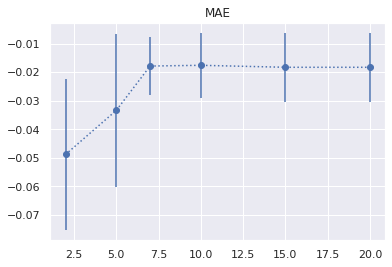

In [12]:
mask_mae = results.param_criterion == 'mae'

plt.figure(0)
plt.title('MAE')
#plt.ylim(0,1)
plt.errorbar(x=results[mask_mae].param_max_depth, y=results[mask_mae].mean_test_score,yerr=results[mask_mae].std_test_score,fmt='o:')

### Plotea exactamente la misma curva que antes, pero para el caso de mse


<ErrorbarContainer object of 3 artists>

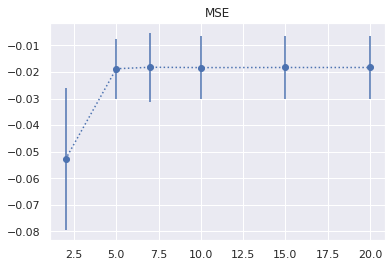

In [13]:
### RESPUESTA
mask_mse = results.param_criterion == 'mse'

plt.figure(1)
plt.title('MSE')
#plt.ylim(0,1)
plt.errorbar(x=results[mask_mse].param_max_depth, y=results[mask_mse].mean_test_score,yerr=results[mask_mse].std_test_score,fmt='o:')

Que magnitudes son las que ploteaste? <br>
Que significa el error de cada curva? <br>
En que se parecen y en que se diferencian las curvas de arriba? De donde crees que vienen las diferencias? <br>
Plotearias algo que te ayude a comprobar tu hipotesis? <br>

### Podes ver mas funciones en la documentacion!


In [14]:
print(clf.best_estimator_)
print(clf.best_score_)

results.sort_values(by=['rank_test_score'],inplace=True)
print(results[['rank_test_score','mean_test_score','std_test_score','params']])

DecisionTreeRegressor(criterion='mae', max_depth=10)
-0.01761212121212121
    rank_test_score  mean_test_score  std_test_score  \
3                 1        -0.017612        0.011399   
2                 2        -0.017875        0.010129   
8                 3        -0.018216        0.012996   
4                 4        -0.018306        0.011981   
5                 4        -0.018306        0.011981   
10                4        -0.018306        0.011981   
11                4        -0.018306        0.011981   
9                 8        -0.018340        0.011988   
7                 9        -0.018776        0.011309   
1                10        -0.033400        0.026729   
0                11        -0.048832        0.026588   
6                12        -0.052826        0.026828   

                                   params  
3   {'criterion': 'mae', 'max_depth': 10}  
2    {'criterion': 'mae', 'max_depth': 7}  
8    {'criterion': 'mse', 'max_depth': 7}  
4   {'criterion': 'ma

Te parece razonable el modelo que elogio el Grid Search? O eligirias algun otro?

### Una vez que hayas elegido el que pensas que es el mejor modelo, reporta tu estimacion de la performance evaluando sobre el conjunto Held-out que separaste al principio.

In [15]:
y_pred_train=clf.predict(X_train)

In [16]:
y_pred_test=clf.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### RMSE en TRAIN y TEST

In [18]:
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))
print(np.sqrt(mean_squared_error(y_train, y_pred_train)))

0.21244145675696072
0.019861810728725844


### MSE en TRAIN y TEST

In [21]:
print(mean_squared_error(y_train, y_pred_train))
print(mean_squared_error(y_test, y_pred_test))


0.000394491525423729
0.04513137254901961


### R2 en TRAIN y TEST

In [22]:
print(r2_score(y_train, y_pred_train)) # clf.score(X_train,y_train)
print(r2_score(y_test, y_pred_test)) # clf.score(X_test,y_test)


0.9960980889948834
0.5881671290663455


## DESAFIO
Realiza el mismo procedimiento, pero esta vez implementando el algoritmo de regresion de KNN. <br>

Antes de empezar, piensa cuales son los hiperparametros que recorrerias con el Grid Search.